In [61]:
from __future__ import (division, print_function)

In [62]:
%autoreload 2
%matplotlib inline

In [63]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [64]:
from datetime import datetime
print (datetime.now().strftime("%D"))

11/07/15


In [65]:
from scipy import ndimage as ndi
from skimage.morphology import watershed
from skimage.segmentation import random_walker
from skimage.feature import peak_local_max
from skimage import feature

In [66]:
import random

In [67]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd
import h5py
import cPickle
from scipy.spatial import KDTree
#import seaborn as sns
#sns.set_style('white')

In [68]:
import copy

In [69]:
import statsmodels as sm

In [98]:
import sys
sys.path.append("../")
import extract_catalog as ec
import plot_gal_prop as plotg
import plot_DM_prop as plotDM
import get_DM_centroids as getDM
import get_gal_centroids as getgal
import get_KDE 
import compute_distance as get_dist

In [71]:
import healpy as hp

```Python
data_f = h5py.File("../../data/Illustris-1_fof_subhalo" +
                   "_myCompleteHaloCatalog_00135.hdf5")

part_halos = h5py.File("../../data/DM_particles_clst_loc.h5")
haloEndIx = part_halos["loc"][...]
```

In [72]:
partDMfile = "../../data/Illustris-1_" + \
    "00135_APillepich_KarenNG_ParticleData_Group_PartType1.h5"
partDM = h5py.File(partDMfile)  
big_fhat_file = "../../data/test_fhat_129.h5"
fhat_file = h5py.File(big_fhat_file)

In [73]:
fixed_h5path = "0/min/i_band/2"

want to figure out how many different estimates there are for each cluster

In [74]:
fhat_stars = cPickle.load(open("../../data/fhat_I_lum.pkl", "r"))

In [94]:
from scipy.spatial import KDTree

In [100]:
good_threshold = \
    getDM.apply_peak_num_threshold(fhat_stars[22]["peaks_dens"], fhat)

DM_peak_no = getDM.find_num_of_significant_peaks(fhat["peaks_dens"],
                                                 good_threshold)


In [101]:
DM_peak_no

3

In [110]:
clstNo = 22

In [111]:
fhat_stars[clstNo]["peaks_dens"]

array([ 1.        ,  0.03933756])

In [112]:
np.array([fhat_stars[clstNo]["peaks_xcoords"], 
          fhat_stars[clstNo]["peaks_ycoords"]]
        ).transpose()

array([[  -2.36302424,   11.01988177],
       [-224.9656708 ,  789.76398926]])

In [113]:
np.array([fhat["peaks_xcoords"][:DM_peak_no], 
          fhat["peaks_ycoords"][:DM_peak_no]]
        ).transpose()

array([[  4.09484619e+02,   7.35244629e+02],
       [  1.30725098e+00,  -7.75146484e-01],
       [  2.19402100e+02,  -1.33281104e+03]], dtype=float32)

In [115]:
get_dist.compute_distance_between_DM_and_gal_peaks(fhat_stars[22], fhat)

(array([ 12.35287868]), array([1]))

# the first halo id is 1 ..... different than other index scheme

In [126]:
((dist, matched_DM_ixes), sign_gal_peak_no, sign_DM_peak_no) = \
    get_dist.compute_distance_between_DM_and_gal_peaks(fhat_stars[clstNo], fhat)


In [127]:
dist

array([ 554.18157587,   17.78092744,  370.85294321,  423.33707844])

In [128]:
matched_DM_ixes

array([ 3, 14,  4, 18])

In [129]:
sign_gal_peak_no

4

In [130]:
fhat_stars[clstNo]["peaks_dens"]

array([ 1.        ,  0.72524725,  0.70301606,  0.4278439 ])

In [131]:
fhat_stars[clstNo]["peaks_xcoords"]

array([-775.49541502,   26.72337084, -969.1344323 ,  -56.26477943])

In [132]:
fhat_stars[clstNo]["peaks_ycoords"]

array([  1.25444623e+03,  -7.62562494e-01,  -1.64485449e+02,
         1.11801049e+03])

In [133]:
fhat["peaks_xcoords"][:sign_DM_peak_no]

array([ -1.30444336e+00,  -1.10548975e+03,  -4.93125000e+01,
        -1.10949036e+03,  -1.32352637e+03,  -5.49396362e+02,
        -1.32552661e+03,  -1.41354138e+03,   2.16732178e+02,
        -2.73350098e+02,   5.67053223e+01,  -1.30152258e+03,
        -1.33152759e+03,  -1.11349097e+03,   1.26979980e+01,
        -1.32952734e+03,  -1.10949036e+03,  -1.27551831e+03,
         3.22750000e+02,   4.18766113e+02,  -1.11549146e+03,
        -1.11549146e+03,  -3.30468750e+00,   1.86989746e+01], dtype=float32)

In [134]:
fhat["peaks_ycoords"][:sign_DM_peak_no]

array([  3.10791016e-01,   1.83870337e+03,   1.59065039e+03,
         1.69667310e+03,  -2.73747803e+02,  -7.69091797e+00,
        -2.79749146e+02,  -1.79727783e+02,  -4.36987305e+01,
         1.70067383e+03,   3.63183594e+01,   7.18464111e+02,
        -2.69746948e+02,   1.72067822e+03,  -1.16918945e+01,
        -2.63745728e+02,   1.81869897e+03,   1.55464258e+03,
         1.30658960e+03,   2.03149414e+01,   1.82269995e+03,
         1.85670728e+03,   2.43159180e+01,   1.63142090e+01], dtype=float32)

Converting unit of kpc / h to kpc for galaxy data


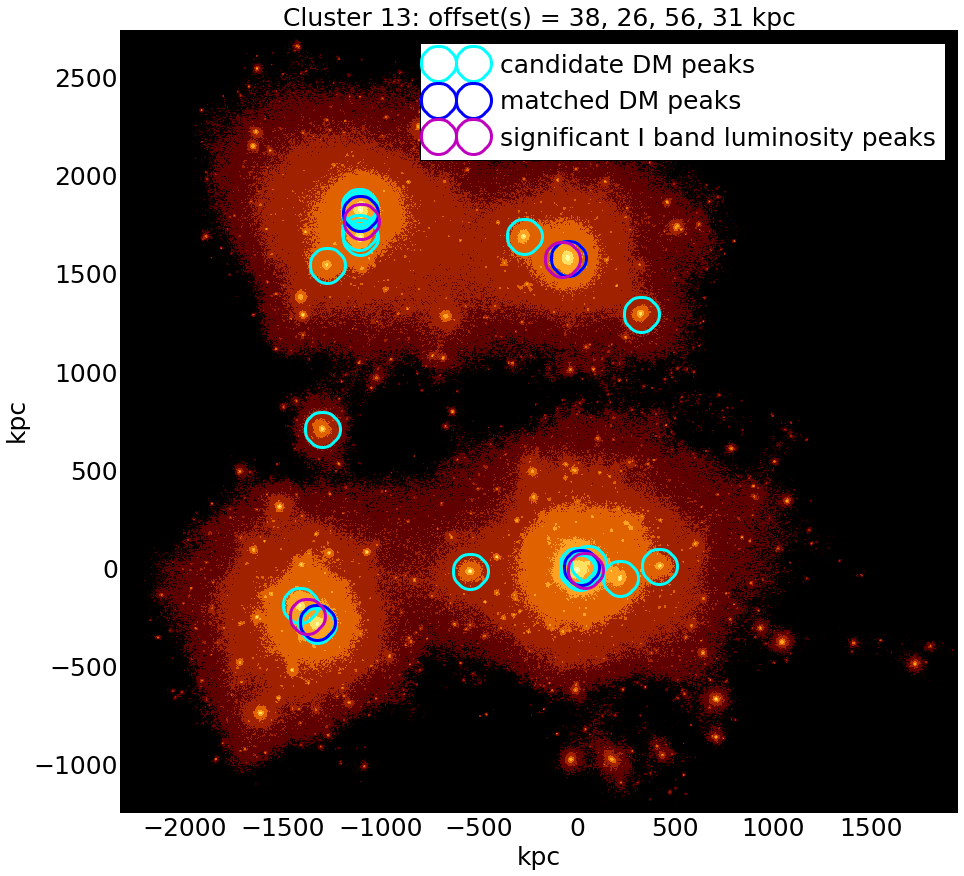

In [136]:
for clstNo in range(13, 14):
    coord_dict = ec.get_DM_particles([clstNo], partDM, 
                                     dataPath="../../data/")
    coord = coord_dict[clstNo]['coords']
    fhat = getDM.make_histogram_with_2kpc_resolution(coord_dict[clstNo])
    good_threshold = getDM.apply_peak_num_threshold(fhat_stars[clstNo]["peaks_dens"], fhat)
    plt.figure(figsize=(15, 15))
    plotDM.plot_DM_fhat(fhat, fhat_stars[clstNo], clstNo, threshold=good_threshold)
    plt.show()
    plt.close()

Converting unit of kpc / h to kpc for galaxy data


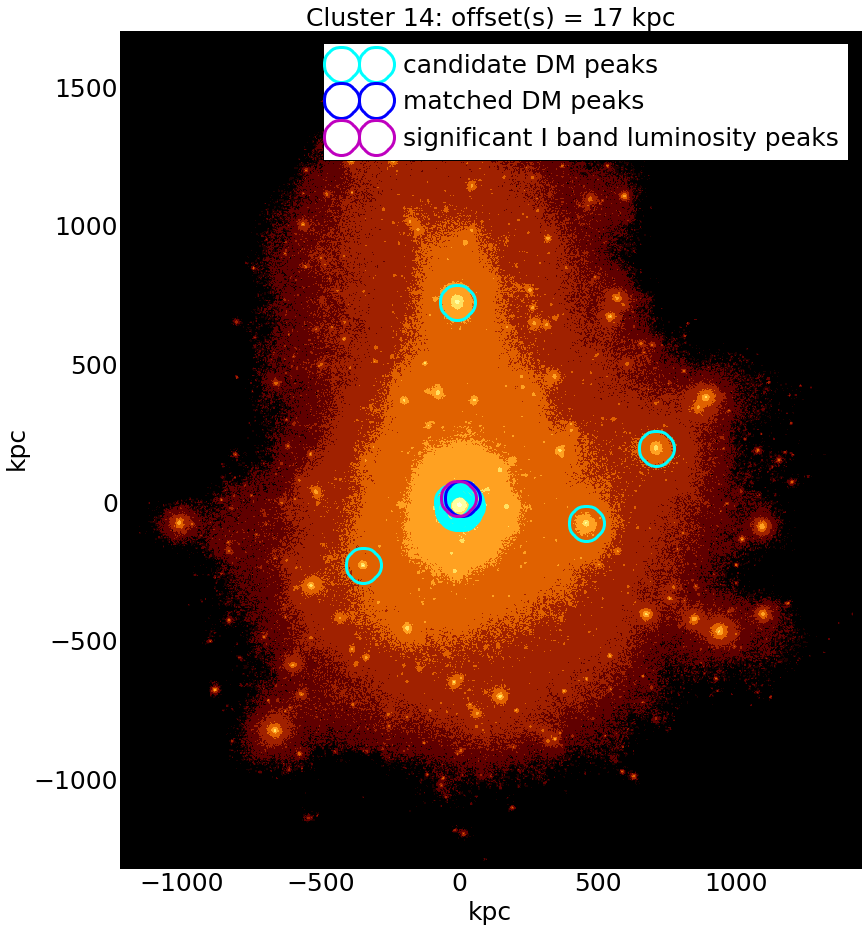

Converting unit of kpc / h to kpc for galaxy data


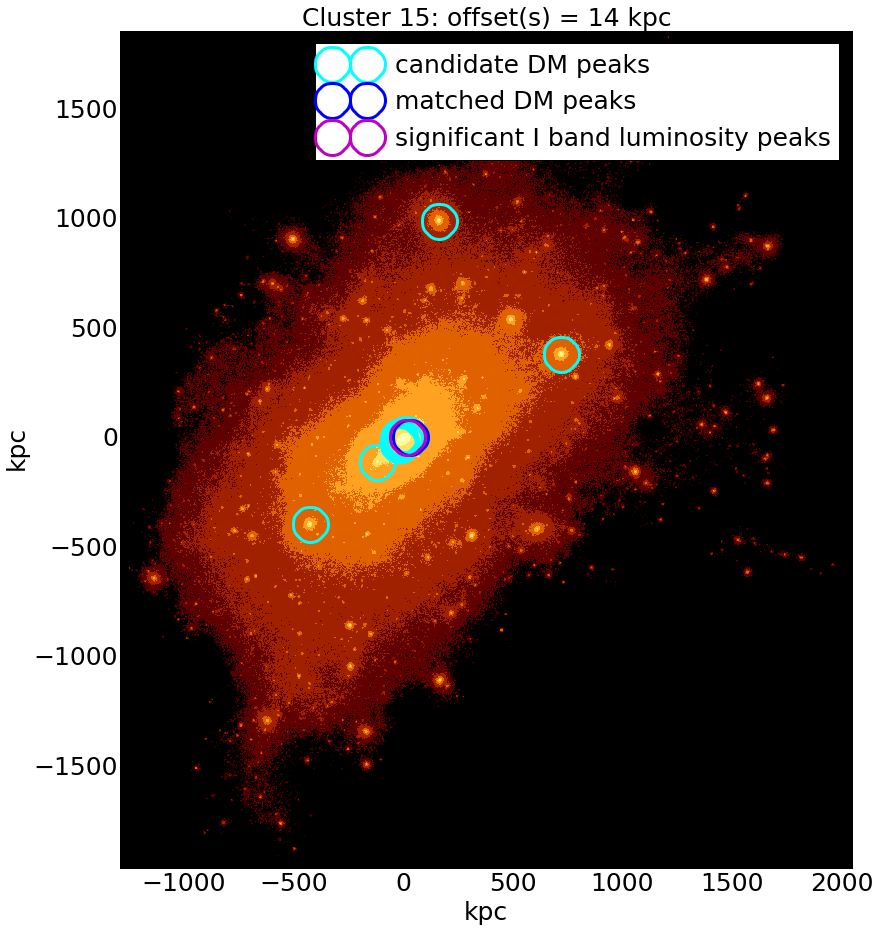

Converting unit of kpc / h to kpc for galaxy data


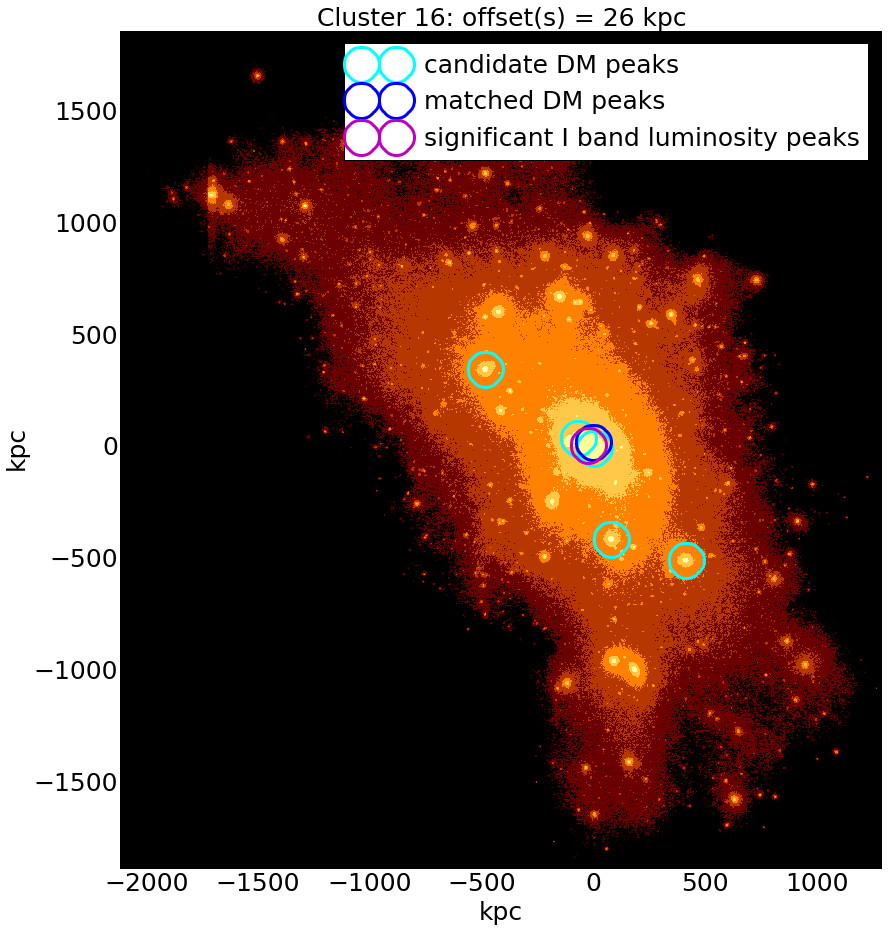

Converting unit of kpc / h to kpc for galaxy data


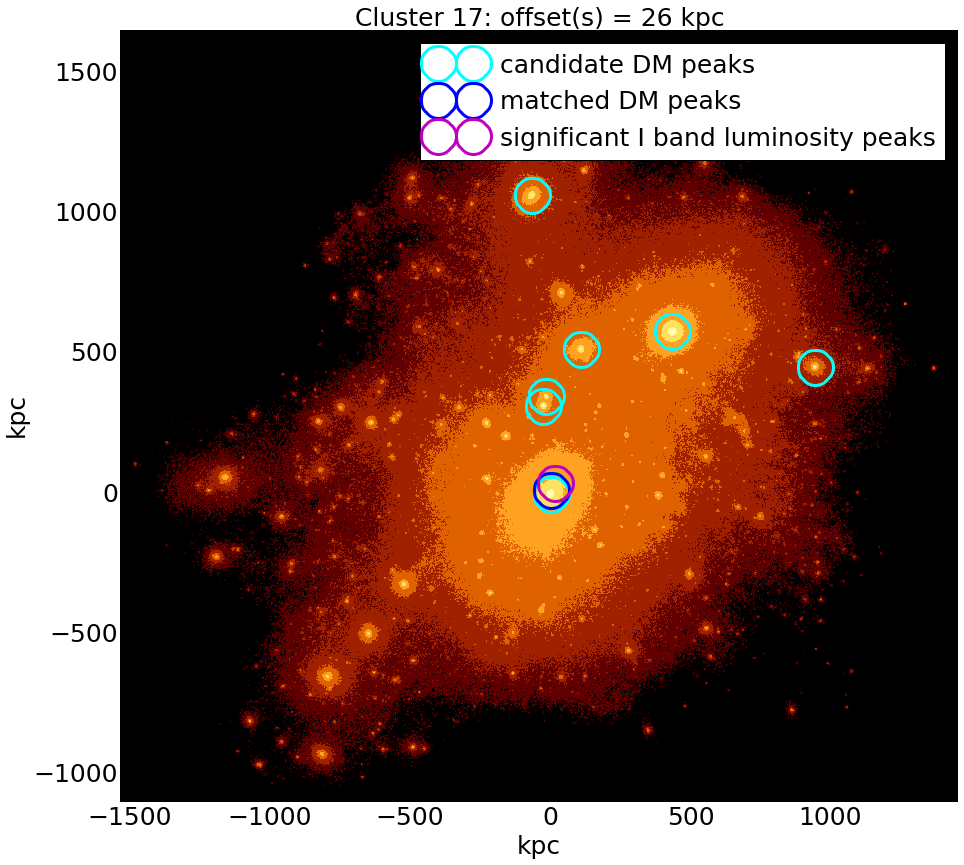

Converting unit of kpc / h to kpc for galaxy data


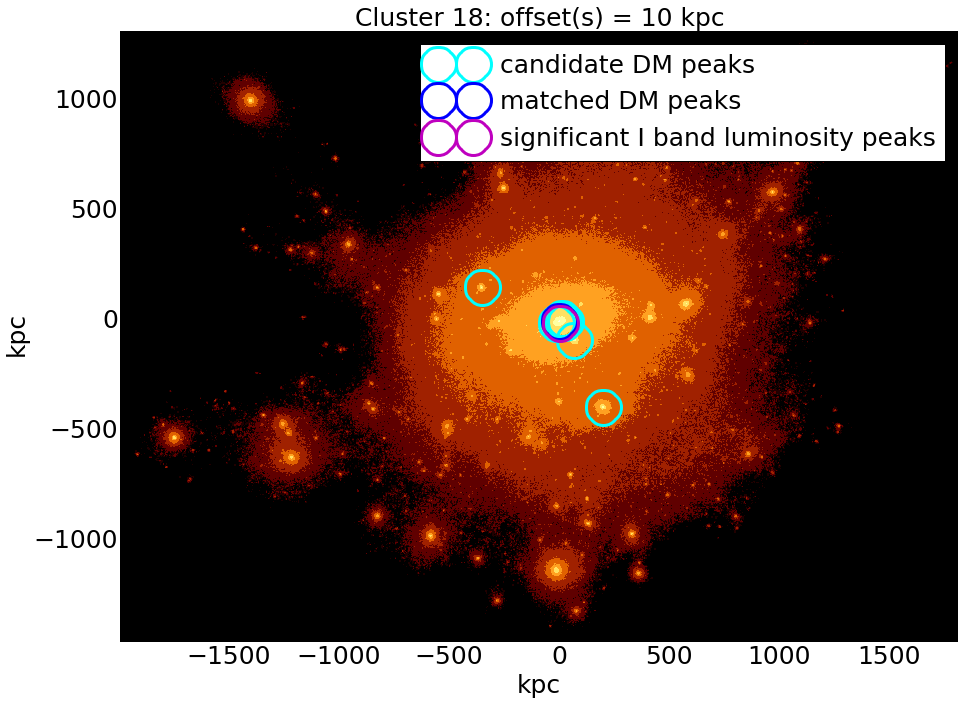

In [ ]:
for clstNo in range(14, 20):
    coord_dict = ec.get_DM_particles([clstNo], partDM, 
                                     dataPath="../../data/")
    coord = coord_dict[clstNo]['coords']
    fhat = getDM.make_histogram_with_2kpc_resolution(coord_dict[clstNo])
    good_threshold = getDM.apply_peak_num_threshold(fhat_stars[clstNo]["peaks_dens"], fhat)
    plt.figure(figsize=(15, 15))
    plotDM.plot_DM_fhat(fhat, fhat_stars[clstNo], clstNo, threshold=good_threshold)
    plt.show()
    plt.close()